In [51]:
import os
import random
from tqdm import tqdm
from PIL import Image

In [52]:
img_size = 96
ttf_path = "../data/raw/ttf/"
read_path = "nointer"
save_path = "inter"

In [16]:
import time
while True:
    print(f"\r{len(os.listdir(save_path))}", end="", flush=True)
    time.sleep(1)

708467

KeyboardInterrupt: 

In [53]:
class ImageConcat:
    def __init__(self, n_h, n_v, resolution=1000):
        self.n_h = n_h
        self.n_v = n_v
        self.r = resolution
        self.img = Image.new("RGB", (self.n_h*self.r, self.n_v*self.r))
        self.cursor = [0,0]    
    
    def move_cursor_h(self):
        self.cursor[0] += self.r
        
    def move_cursor_v(self):
        self.cursor[1] += self.r
        
    def reset_cursor_h(self):
        self.cursor[0] = 0
        
    def append_img(self, path):
        try:
            self.img.paste(Image.open(path).convert('RGB'), tuple(self.cursor))
        except:
            print(f"Not Appended: {path}")
        
    def save_img(self, path):
        self.img.save(path)

In [54]:
def sample_imgs(fd):
    files = [f"{fd}/{f}" for f in os.listdir(fd) if ".png" in f]
    bigimg = ImageConcat(n_h=10, n_v=10, resolution=96)
    for _ in range(10):
        for _ in range(10):
            bigimg.append_img(files[random.randint(0,len(files)-1)])
            bigimg.move_cursor_h()
        bigimg.reset_cursor_h()
        bigimg.move_cursor_v()
    return bigimg
    

In [55]:
def resize_with_padding(image_path, ratio, new_size, padding_color=(255, 255, 255)):
    # Open the image
    img = Image.open(image_path)
    
    # Get the new dimensions based on the ratio
    new_width = int(img.width * ratio)
    new_height = int(img.height * ratio)
    
    # Resize the image using the new dimensions
    resized_img = img.resize((new_width, new_height), Image.BILINEAR)
    
    # Create a new blank image with padding
    padded_img = Image.new("RGB", (new_size, new_size), padding_color)
    
    # Calculate the position to paste the resized image
    left = (padded_img.width - resized_img.width) // 2
    top = (padded_img.height - resized_img.height) // 2
    right = left + resized_img.width
    bottom = top + resized_img.height
    
    # Paste the resized image onto the blank image
    padded_img.paste(resized_img, (left, top, right, bottom))
    
    return padded_img

In [56]:
fonts = list(set([f.split("__")[0] for f in os.listdir(read_path) if ".png" in f]))

In [57]:
for font in tqdm(fonts):
    files = [(f"{read_path}/{f}",f"{save_path}/{f}") for f in os.listdir(read_path) if (".png" in f) and (font in f)]
    max_size = 0
    for rf, sf in files:
        size = Image.open(rf).size
        if max(size) > max_size:
            max_size = max(size)
    ratio = 95/max_size
    for rf,sf in files:
        img = resize_with_padding(rf, ratio, 96)
        with open(sf, "wb") as f:
            img.save(f, "PNG")

100%|██████████| 72/72 [13:51<00:00, 11.55s/it]


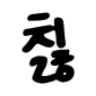

In [44]:
resize_with_padding(files[0], ratio, 96)

In [42]:
max_size

82

In [12]:
Image.open(files[random.randint(0,len(files)-1)]).size

(54, 55)

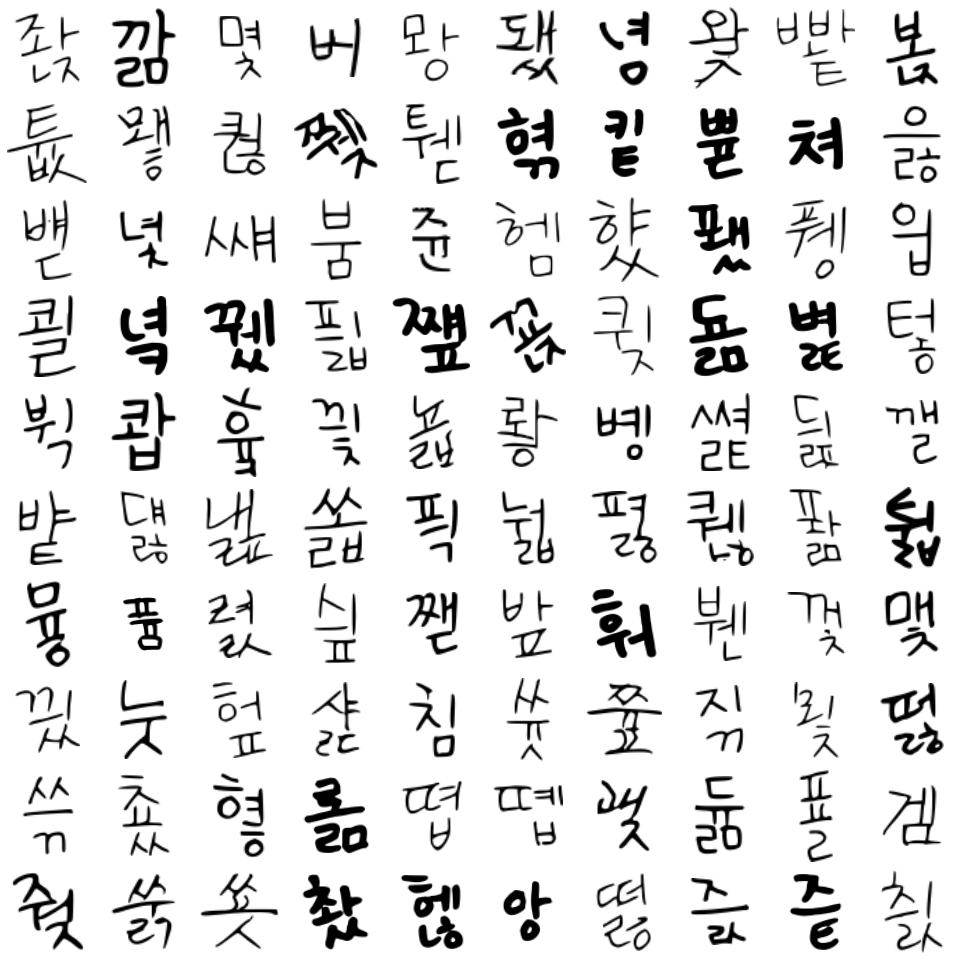

In [58]:
sample_imgs(save_path).img